In [113]:
import pandas as pd
import statsmodels.api as sm
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import pylab as py

In [114]:
# Red the mtcars data

mt_cars = pd.read_csv(r'mtcars.csv')

In [115]:
mt_cars.head()
#mt_cars.shape

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [124]:
mt_cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [116]:
# target is 'am'
# Dependent columns 'wt', 'hp'
y = mt_cars['am']
x  = mt_cars[['hp','wt']]
x=x.assign(bias=32*[1])
x.head()
#y.head()

,hp,wt,bias
0,110,2.620,1
1,110,2.875,1
2,93,2.320,1
3,110,3.215,1
4,175,3.440,1


In [117]:
# build a logistic regression model ising sm.logit
# test the model with 2nd sata point

In [118]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: am, dtype: int64

In [119]:
logit_model=sm.Logit(y,x).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.157174
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     am   No. Observations:                   32
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Aug 2022   Pseudo R-squ.:                  0.7673
Time:                        15:58:31   Log-Likelihood:                -5.0296
converged:                       True   LL-Null:                       -21.615
Covariance Type:            nonrobust   LLR p-value:                 6.267e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hp             0.0363      0.018      2.044      0.041       0.001       0.071
wt            -8.0835      3.

In [120]:
logit_model.predict([110,2.62,1])

array([0.84233554])

In [121]:
x_data=np.array(range(220,400,1))
x_data=x_data/100

In [122]:
y_data=222.6*x_data-519.9

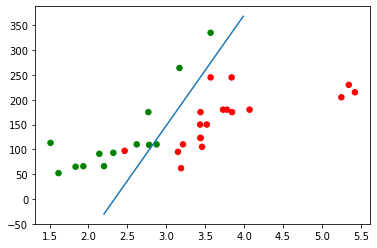

In [123]:
categories=np.array(mt_cars.am)
colormap=np.array(['r','g'])
plt.scatter(mt_cars.wt,mt_cars.hp, s=30, c=colormap[categories], marker='o')
plt.plot(x_data,y_data, color='tab:blue')